In [1]:
import pandas as pd

df = pd.read_csv("Data\Combined_Datasets\Demographic_Combined.csv")



<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
C:\Users\prash\AppData\Local\Temp\ipykernel_19096\1661527310.py:3: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("Data\Combined_Datasets\Demographic_Combined.csv")


In [2]:
# basic info
print(df.shape)
print(df.head())

# unique counts
print("Unique dates:", df["date"].nunique())
print("Unique states:", df["state"].nunique())
print("Unique districts:", df["district"].nunique())
print("Unique pincodes:", df["pincode"].nunique())

# unique (state, district) pairs
print("Unique (state, district) pairs:",
      df[["state", "district"]].drop_duplicates().shape[0])


(2071700, 6)
         date           state    district  pincode  demo_age_5_17  \
0  01-03-2025   Uttar Pradesh   Gorakhpur   273213             49   
1  01-03-2025  Andhra Pradesh    Chittoor   517132             22   
2  01-03-2025         Gujarat      Rajkot   360006             65   
3  01-03-2025  Andhra Pradesh  Srikakulam   532484             24   
4  01-03-2025       Rajasthan     Udaipur   313801             45   

   demo_age_17_  
0           529  
1           375  
2           765  
3           314  
4           785  
Unique dates: 95
Unique states: 65
Unique districts: 983
Unique pincodes: 19742
Unique (state, district) pairs: 1078


In [3]:
for s in sorted(df["state"].unique()):
    print(s)


100000
Andaman & Nicobar Islands
Andaman and Nicobar Islands
Andhra Pradesh
Arunachal Pradesh
Assam
BALANAGAR
Bihar
Chandigarh
Chhatisgarh
Chhattisgarh
Dadra & Nagar Haveli
Dadra and Nagar Haveli
Dadra and Nagar Haveli and Daman and Diu
Daman & Diu
Daman and Diu
Darbhanga
Delhi
Goa
Gujarat
Haryana
Himachal Pradesh
Jaipur
Jammu & Kashmir
Jammu and Kashmir
Jharkhand
Karnataka
Kerala
Ladakh
Lakshadweep
Madanapalle
Madhya Pradesh
Maharashtra
Manipur
Meghalaya
Mizoram
Nagaland
Nagpur
ODISHA
Odisha
Orissa
Pondicherry
Puducherry
Punjab
Puttenahalli
Raja Annamalai Puram
Rajasthan
Sikkim
Tamil Nadu
Telangana
Tripura
Uttar Pradesh
Uttarakhand
Uttaranchal
WEST BENGAL
WESTBENGAL
West  Bengal
West Bangal
West Bengal
West Bengli
West bengal
Westbengal
andhra pradesh
odisha
west Bengal


In [10]:
df[df["state"].str.strip().str.fullmatch("Delhi", na=False)]


,date,state,district,pincode,demo_age_5_17,demo_age_17_
60,01-03-2025,Delhi,Central Delhi,110055,109,1458
124,01-03-2025,Delhi,North East Delhi,110094,1013,7227
179,01-03-2025,Delhi,South Delhi,110024,18,426
220,01-03-2025,Delhi,South West Delhi,110045,402,4205
488,01-03-2025,Delhi,South West Delhi,110029,20,308
...,...,...,...,...,...,...
2067191,29-12-2025,Delhi,South West Delhi,110045,8,86
2067192,29-12-2025,Delhi,South West Delhi,110046,0,35
2067193,29-12-2025,Delhi,South West Delhi,110066,0,2
2067194,29-12-2025,Delhi,West Delhi,110043,0,12


In [11]:
repeat_counts = (
    df.groupby(["state", "district", "pincode"])
      .size()
      .reset_index(name="count")
      .query("count > 1")
)

print(repeat_counts)


                           state           district  pincode  count
0                         100000             100000   100000      2
1      Andaman & Nicobar Islands           Andamans   744101     75
2      Andaman & Nicobar Islands           Andamans   744102      6
3      Andaman & Nicobar Islands           Andamans   744103     60
4      Andaman & Nicobar Islands           Andamans   744105     62
...                          ...                ...      ...    ...
31503             andhra pradesh         rangareddi   501218     16
31504                     odisha           Gajapati   761201      3
31505                     odisha           Gajapati   761207      9
31506                     odisha           Gajapati   761208      5
31507                west Bengal  South 24 Parganas   743368     11

[30422 rows x 4 columns]


In [12]:
df[
    (df["state"] == "Andaman & Nicobar Islands") &
    (df["district"] == "Andamans") &
    (df["pincode"] == 744101)
][["date"]].sort_values("date").drop_duplicates().shape


(54, 1)

In [13]:
pair_df = df[
    (df["state"] == "Andaman & Nicobar Islands") &
    (df["district"] == "Andamans") &
    (df["pincode"] == 744101)
].copy()


In [14]:
pair_df["date"] = pd.to_datetime(pair_df["date"], dayfirst=True)
pair_df = pair_df.sort_values("date")


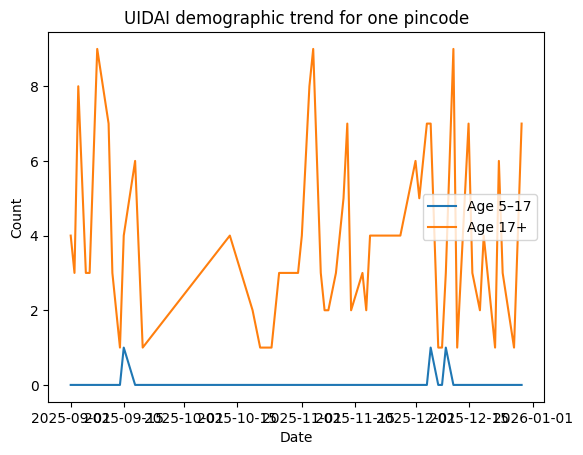

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(pair_df["date"], pair_df["demo_age_5_17"], label="Age 5–17")
plt.plot(pair_df["date"], pair_df["demo_age_17_"], label="Age 17+")
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("UIDAI demographic trend for one pincode")
plt.legend()
plt.show()


In [16]:
test_cases = [
    ("Delhi", "Central Delhi"),
    ("Delhi", "South Delhi"),
    ("Maharashtra", "Mumbai"),
    ("Karnataka", "Bengaluru Urban"),
    ("Tamil Nadu", "Chennai")
]


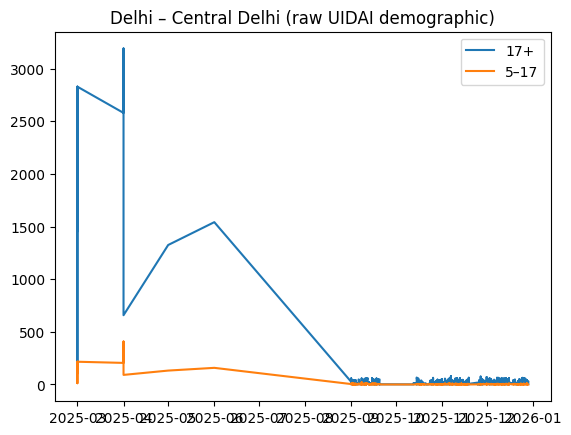

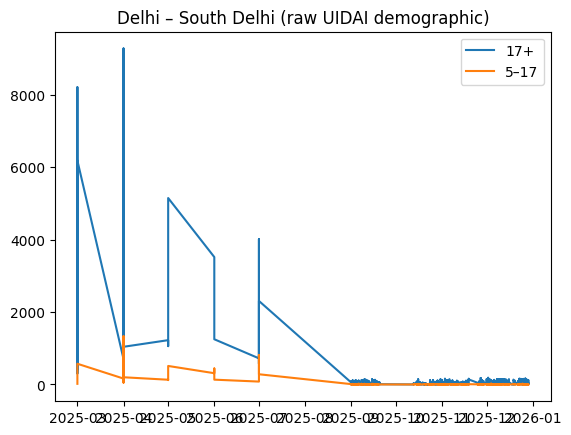

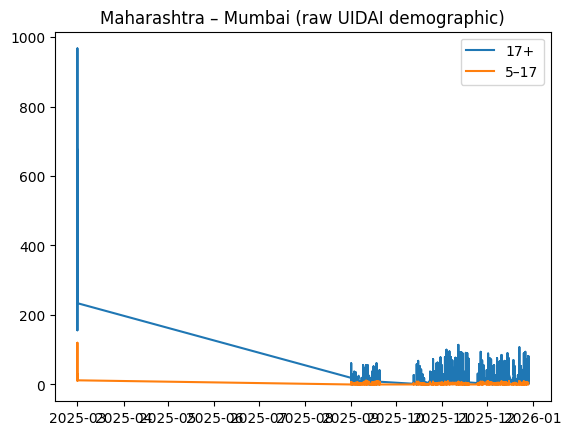

Skipping Karnataka – Bengaluru Urban (not found)


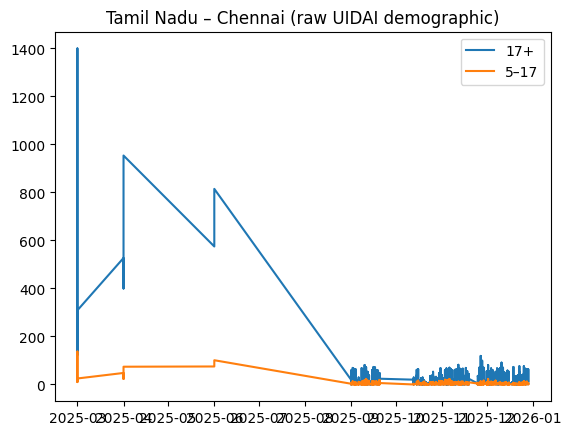

In [17]:


for state, district in test_cases:
    sub = df[
        (df["state"] == state) &
        (df["district"] == district)
    ].copy()

    if sub.empty:
        print(f"Skipping {state} – {district} (not found)")
        continue

    sub["date"] = pd.to_datetime(sub["date"], dayfirst=True)
    sub = sub.sort_values("date")

    plt.figure()
    plt.plot(sub["date"], sub["demo_age_17_"], label="17+")
    plt.plot(sub["date"], sub["demo_age_5_17"], label="5–17")
    plt.title(f"{state} – {district} (raw UIDAI demographic)")
    plt.legend()
    plt.show()

In [4]:
dup_geo = df.duplicated(subset=["state", "district"], keep=False)
df[dup_geo].sort_values(["state", "district", "date"])


,date,state,district,pincode,demo_age_5_17,demo_age_17_
2007370,20-12-2025,100000,100000,100000,0,1
795161,23-12-2025,100000,100000,100000,0,1
6660,01-09-2025,Andaman & Nicobar Islands,Andamans,744103,0,1
420893,01-09-2025,Andaman & Nicobar Islands,Andamans,744105,0,1
420894,01-09-2025,Andaman & Nicobar Islands,Andamans,744106,0,2
...,...,...,...,...,...,...
2002211,15-12-2025,west Bengal,South 24 Parganas,743368,0,1
1313094,16-09-2025,west Bengal,South 24 Parganas,743368,0,1
582910,16-11-2025,west Bengal,South 24 Parganas,743368,0,1
1907878,16-11-2025,west Bengal,South 24 Parganas,743368,0,1


In [5]:
repeat_across_dates = (
    df.groupby(["state", "district"])
      .agg(unique_dates=("date", "nunique"),
           rows=("date", "count"))
      .reset_index()
)

repeat_across_dates[repeat_across_dates["unique_dates"] > 1]


,state,district,unique_dates,rows
0,100000,100000,2,2
1,Andaman & Nicobar Islands,Andamans,80,314
2,Andaman & Nicobar Islands,Nicobars,3,4
3,Andaman & Nicobar Islands,South Andaman,73,195
4,Andaman and Nicobar Islands,Nicobar,59,128
...,...,...,...,...
1073,Westbengal,Howrah,5,7
1074,andhra pradesh,chittoor,24,37
1075,andhra pradesh,rangareddi,13,16
1076,odisha,Gajapati,12,17


In [3]:
import pandas as pd

# --- normalize text ---
df["state_clean"] = (
    df["state"]
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r"\s+", " ", regex=True)
)

# --- canonical mapping ---
STATE_MAP = {
    "andaman & nicobar islands": "Andaman and Nicobar Islands",
    "andhra pradesh": "Andhra Pradesh",
    "chhatisgarh": "Chhattisgarh",
    "dadra & nagar haveli": "Dadra and Nagar Haveli and Daman and Diu",
    "dadra and nagar haveli": "Dadra and Nagar Haveli and Daman and Diu",
    "daman & diu": "Dadra and Nagar Haveli and Daman and Diu",
    "daman and diu": "Dadra and Nagar Haveli and Daman and Diu",
    "jammu & kashmir": "Jammu and Kashmir",
    "orissa": "Odisha",
    "pondicherry": "Puducherry",
    "uttaranchal": "Uttarakhand",
    "westbengal": "West Bengal",
    "west bengli": "West Bengal",
    "west bangal": "West Bengal",
    "west  bengal": "West Bengal",
}

# --- apply mapping; fall back to title case ---
df["state_std"] = df["state_clean"].map(STATE_MAP).fillna(df["state_clean"].str.title())

# --- drop numeric garbage ---
df = df[~df["state_std"].str.fullmatch(r"\d+", na=False)]

# --- allow-list of valid States + UTs ---
VALID_STATES_UTS = {
    "Andhra Pradesh","Arunachal Pradesh","Assam","Bihar","Chhattisgarh",
    "Goa","Gujarat","Haryana","Himachal Pradesh","Jharkhand","Karnataka",
    "Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram",
    "Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu",
    "Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal",
    "Delhi","Jammu and Kashmir","Ladakh",
    "Andaman and Nicobar Islands","Chandigarh",
    "Dadra and Nagar Haveli and Daman and Diu",
    "Lakshadweep","Puducherry"
}

df = df[df["state_std"].isin(VALID_STATES_UTS)]

# --- result ---
print(df["state_std"].nunique())      # should be 36
print(sorted(df["state_std"].unique()))


36
['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']


In [4]:
df

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_clean,state_std
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529,uttar pradesh,Uttar Pradesh
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375,andhra pradesh,Andhra Pradesh
2,01-03-2025,Gujarat,Rajkot,360006,65,765,gujarat,Gujarat
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314,andhra pradesh,Andhra Pradesh
4,01-03-2025,Rajasthan,Udaipur,313801,45,785,rajasthan,Rajasthan
...,...,...,...,...,...,...,...,...
2071695,29-12-2025,West Bengal,West Midnapore,721212,0,12,west bengal,West Bengal
2071696,29-12-2025,West Bengal,West Midnapore,721420,0,1,west bengal,West Bengal
2071697,29-12-2025,West Bengal,West Midnapore,721424,0,5,west bengal,West Bengal
2071698,29-12-2025,West Bengal,West Midnapore,721426,0,3,west bengal,West Bengal


In [4]:
age_17_by_state = df.groupby("state_std")["demo_age_17_"].sum().reset_index()

# optionally, rename column
age_17_by_state.rename(columns={"demo_age_17_": "total_age_17"}, inplace=True)

# show result
print(age_17_by_state)

                                   state_std  total_age_17
0                Andaman and Nicobar Islands          1046
1                             Andhra Pradesh       1974434
2                          Arunachal Pradesh         30660
3                                      Assam        928098
4                                      Bihar       4434327
5                                 Chandigarh         70228
6                               Chhattisgarh       1840231
7   Dadra and Nagar Haveli and Daman and Diu          6847
8                                      Delhi       1263399
9                                        Goa         31845
10                                   Gujarat       1615853
11                                   Haryana       1026826
12                          Himachal Pradesh        129790
13                         Jammu and Kashmir           403
14                                 Jharkhand       1301813
15                                 Karnataka       14303

In [5]:
age_5_17_by_state = df.groupby("state_std")["demo_age_5_17"].sum().reset_index()

# optionally, rename column
age_5_17_by_state.rename(columns={"demo_age_5_17": "total_age_5_17"}, inplace=True)

# show result
print(age_5_17_by_state)

                                   state_std  total_age_5_17
0                Andaman and Nicobar Islands              13
1                             Andhra Pradesh          321148
2                          Arunachal Pradesh            5783
3                                      Assam           84480
4                                      Bihar          380023
5                                 Chandigarh           13133
6                               Chhattisgarh          165207
7   Dadra and Nagar Haveli and Daman and Diu            1617
8                                      Delhi          175535
9                                        Goa            3275
10                                   Gujarat          208474
11                                   Haryana          139314
12                          Himachal Pradesh           19424
13                         Jammu and Kashmir              23
14                                 Jharkhand           99376
15                      

In [6]:
india_total = pd.DataFrame({
    "state_std": ["India"],
    "total_age_5_17": [age_5_17_by_state["total_age_5_17"].sum()]
})

india_total2 = pd.DataFrame({
    "state_std": ["India"],
    "total_age_17": [age_17_by_state["total_age_17"].sum()]
})

# --- append India row to the state-level df (optional) ---
age_5_17_by_state = pd.concat([age_5_17_by_state, india_total], ignore_index=True)
age_17_by_state = pd.concat([age_17_by_state, india_total2], ignore_index=True)

merged_df = pd.merge(age_17_by_state, age_5_17_by_state, on='state_std')
# --- save to CSV ---
merged_df.to_csv("age_demographic_by_state.csv", index=False)

# --- check ---
print(merged_df)

                                   state_std  total_age_17  total_age_5_17
0                Andaman and Nicobar Islands          1046              13
1                             Andhra Pradesh       1974434          321148
2                          Arunachal Pradesh         30660            5783
3                                      Assam        928098           84480
4                                      Bihar       4434327          380023
5                                 Chandigarh         70228           13133
6                               Chhattisgarh       1840231          165207
7   Dadra and Nagar Haveli and Daman and Diu          6847            1617
8                                      Delhi       1263399          175535
9                                        Goa         31845            3275
10                                   Gujarat       1615853          208474
11                                   Haryana       1026826          139314
12                       

In [8]:
# --- load the CSV ---
df = pd.read_csv(r"census data\census_annual_2007_onwards.csv")

# --- see all unique regions / states ---
print("All Regions in dataset:")
print(df["Region"].unique())

All Regions in dataset:
['INDIA' 'Jammu & Kashmir' 'Himachal Pradesh' 'Punjab' 'Chandigarh'
 'Uttarakhand' 'Haryana' 'NCT OF Delhi' 'Rajasthan' 'Uttar Pradesh'
 'Bihar' 'Sikkim' 'Arunachal Pradesh *' 'Nagaland   ^' 'Manipur' 'Mizoram'
 'Tripura' 'Meghalaya' 'Assam' 'West Bengal' 'Jharkhand' 'Odisha'
 'Chhattisgarh' 'Madhya Pradesh   $$' 'Gujarat' 'Daman & Diu '
 'Dadra & Nagar Haveli' 'Maharashtra  ##' 'Andhra Pradesh @@' 'Karnataka'
 'Goa' 'Lakshadweep' 'Kerala' 'Tamil Nadu' 'Puducherry'
 'Andaman & Nicobar Islands']


In [ ]:
df["state_clean"] = (
    df["state"]
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r"[^a-z\s]", "", regex=True)  # remove symbols like *, ^, @, #, $, &
    .str.replace(r"\s+", " ", regex=True)      # normalize spaces
)

In [10]:
print(df["state_std"].nunique())      # should be 36
print(sorted(df["state_std"].unique()))

0
[]
